# The Plan

- Get some data viz setup
- experiment with kalman filters
- mess with hotelling algos

In [1]:
# imports
%matplotlib inline
!pip install banpei
!pip uninstall numpy --yes
!pip install numpy

import matplotlib
import pandas as pd
import numpy as np
import banpei
import matplotlib.pyplot as plt
print("complete")

You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.
Found existing installation: numpy 1.20.2
Uninstalling numpy-1.20.2:
  Successfully uninstalled numpy-1.20.2
  Using cached numpy-1.20.2-cp38-cp38-macosx_10_9_x86_64.whl (16.0 MB)
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

tensorflow 2.3.0 requires numpy<1.19.0,>=1.16.0, but you'll have numpy 1.20.2 which is incompatible.
tensorflow 2.3.0 requires scipy==1.4.1, but you'll have scipy 1.6.3 which is incompatible.
You should consider upgrading via the '/usr/local/opt/python@3.8/bin/python3.8 -m pip install --upgrade pip' command.
complete


In [2]:
data = pd.read_csv('./data/LST/accelerometer.csv')

# data.plot(x="epoc (ms)", y="x-axis (g)", color="red")
# data.plot(x="epoc (ms)", y="y-axis (g)", color="green")
# data.plot(x="epoc (ms)", y="z-axis (g)")
# print(data["x-axis (g)"])

In [41]:
print(data["timestamp (-0700)"][102])
print(data)

2021-05-03T21.35.21.093
          epoc (ms)        timestamp (-0700)  elapsed (s)  x-axis (g)  \
0     1620102718890  2021-05-03T21.31.58.890        0.000      -0.058   
1     1620102718971  2021-05-03T21.31.58.971        0.081      -0.053   
2     1620102913043  2021-05-03T21.35.13.043      194.153      -0.083   
3     1620102913124  2021-05-03T21.35.13.124      194.234      -0.084   
4     1620102913205  2021-05-03T21.35.13.205      194.315      -0.081   
...             ...                      ...          ...         ...   
1249  1620103013413  2021-05-03T21.36.53.413      294.523      -0.061   
1250  1620103013494  2021-05-03T21.36.53.494      294.604      -0.070   
1251  1620103013574  2021-05-03T21.36.53.574      294.684      -0.070   
1252  1620103013653  2021-05-03T21.36.53.653      294.763      -0.067   
1253  1620103013734  2021-05-03T21.36.53.734      294.844      -0.068   

      y-axis (g)  z-axis (g)  
0          0.942      -0.324  
1          0.948      -0.326  
2     

In [3]:
x = data["x-axis (g)"]
model   = banpei.Hotelling()
results = model.detect(x, 0.1)

# data.plot(x="epoc (ms)", y="x-axis (g)", color="red")


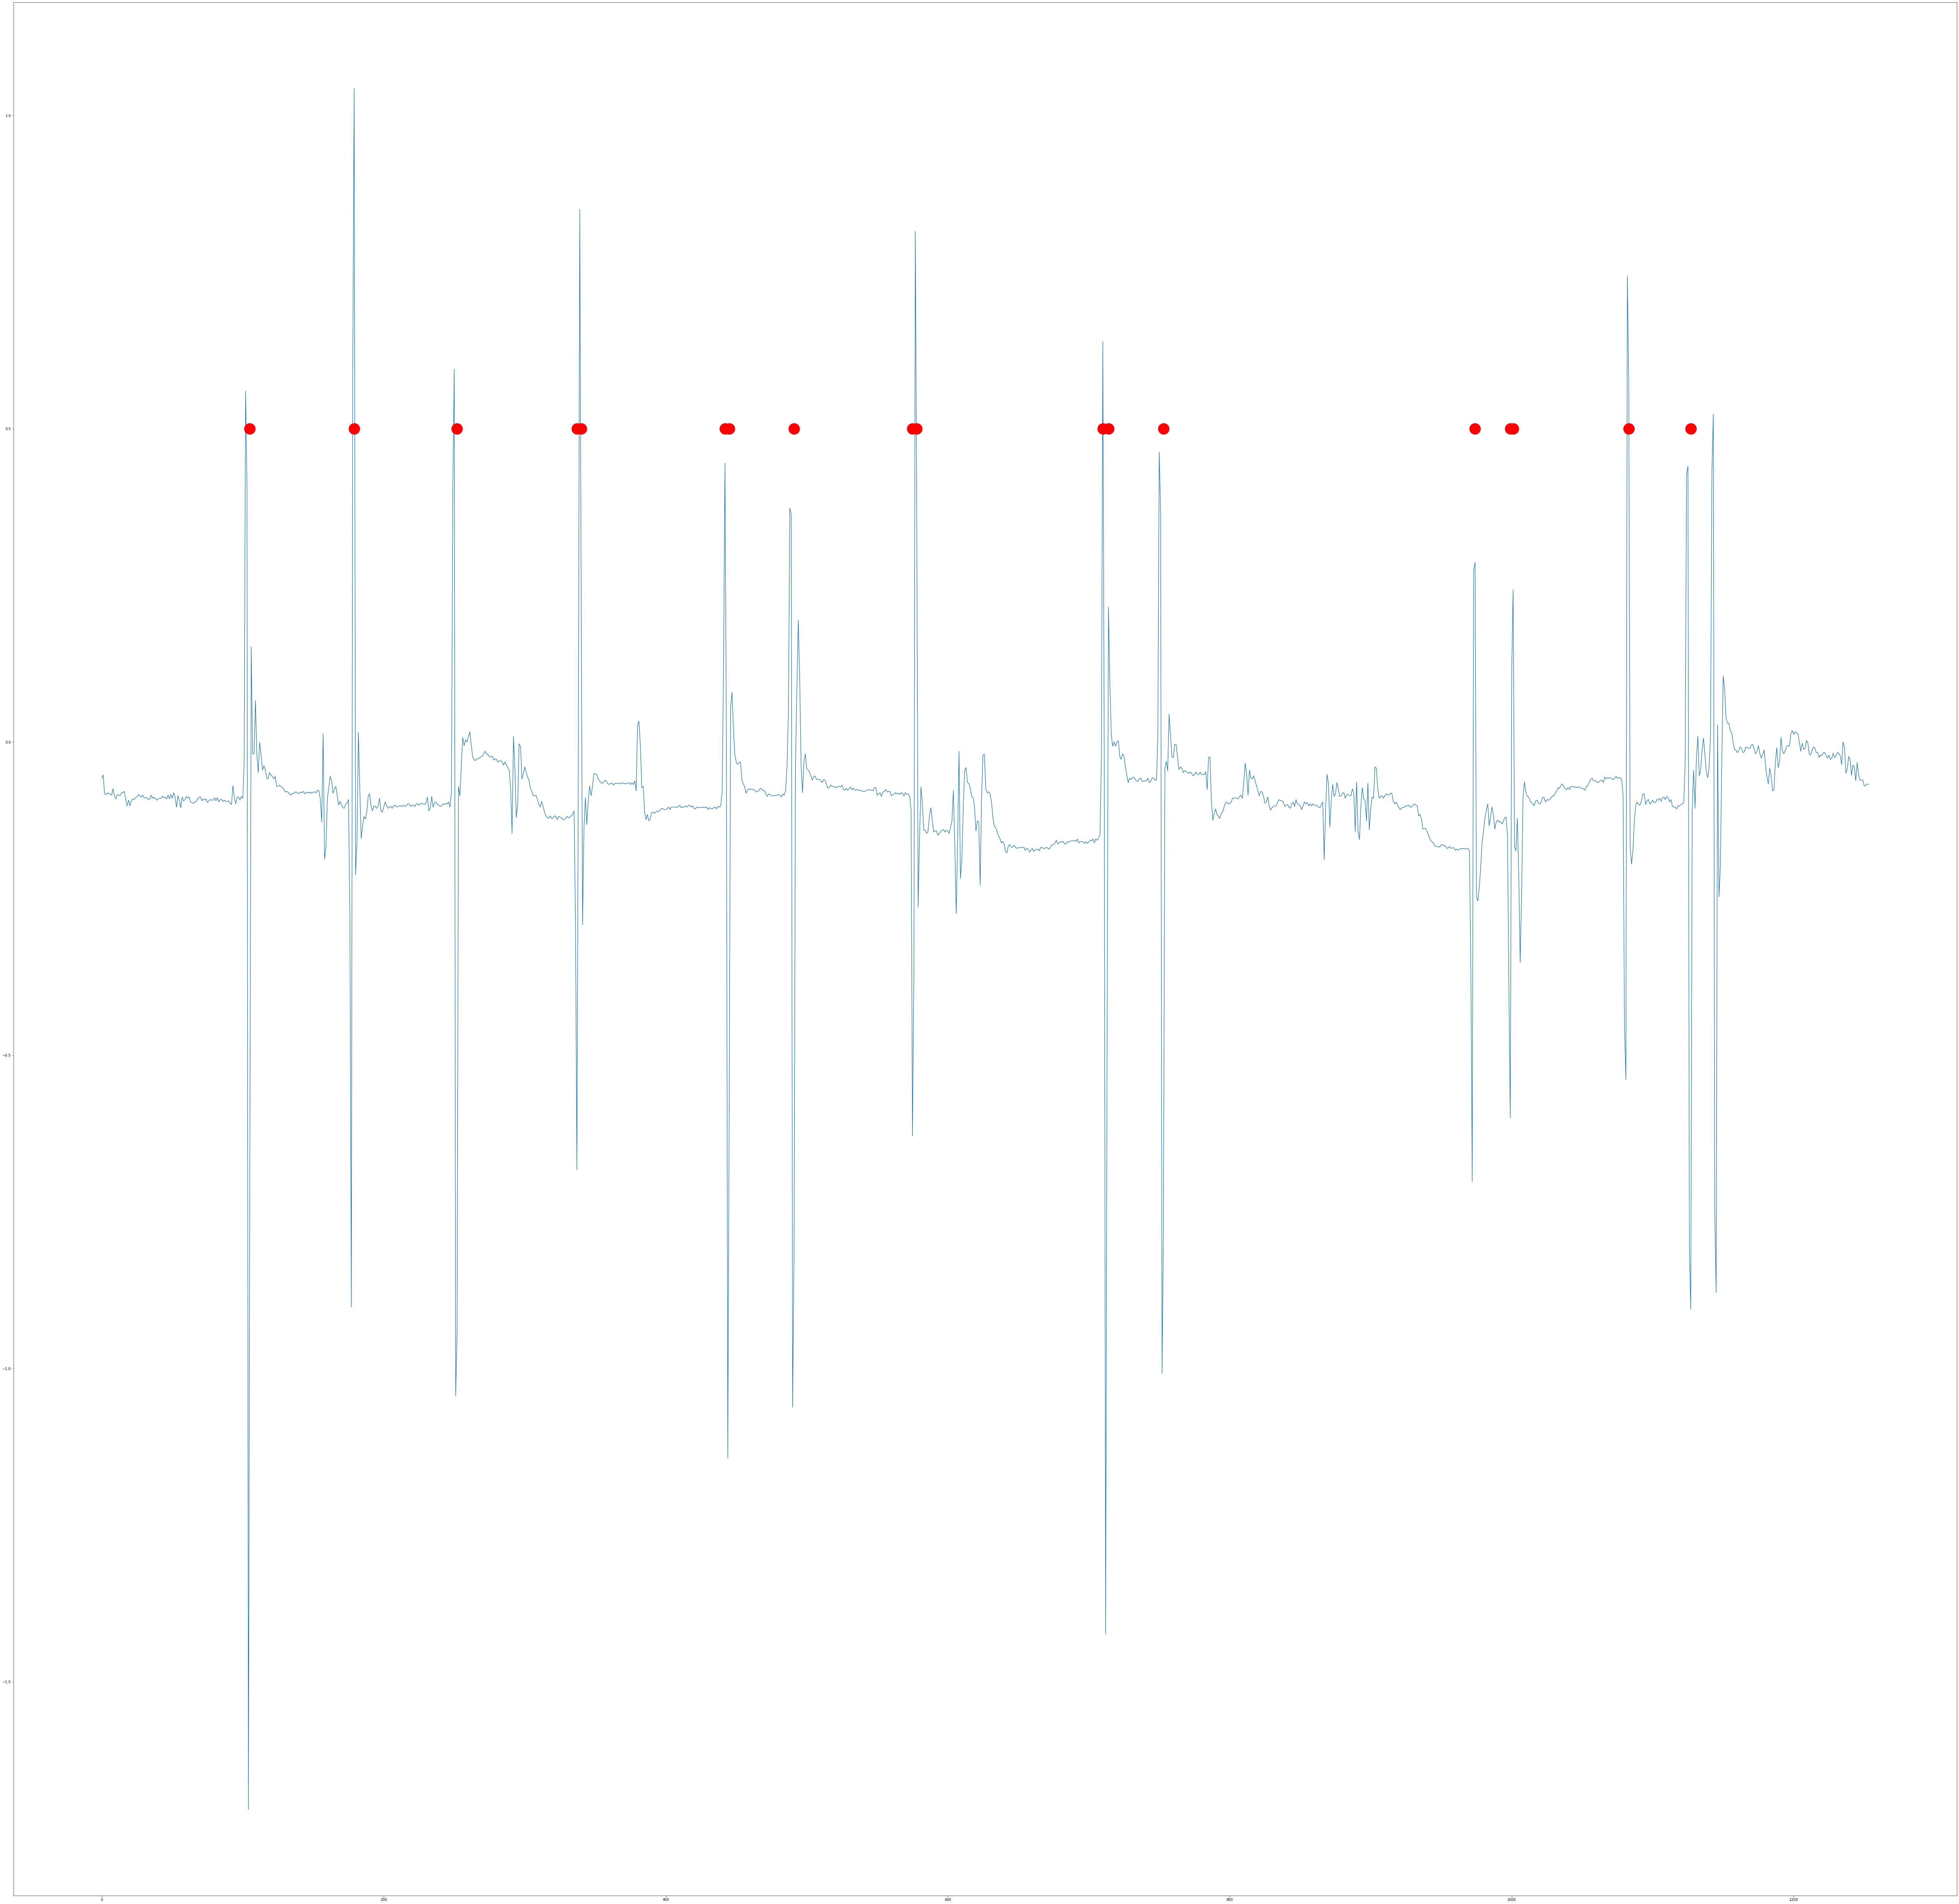

In [36]:
r = [x[0] for x in results]
fr = []
for i in range(len(r)-1):
    if abs(r[i] - r[i+1]) > 1:
        fr.append(r[i])
#     print(r[i])
# print(fr, len(fr))
# r= [102, 103, 104, 105,]
# print(r)
# print(x)
plt.figure(figsize=(100,100))
plt.plot(x, zorder=-1)
plt.scatter(fr, [[0.5]*len(fr)], color="red", zorder=2, s=1000)
# plt.plot(r)
plt.show()

In [62]:
ts = '''00:00:04.3
00:00:06.0
00:00:11.8
00:00:15.1
00:00:18.9
00:00:22.2
00:00:27.3
00:00:31.0
00:00:37.9
00:00:40.5
00:00:41.7
00:00:48.8
00:00:52.1
00:00:54.8
00:00:56.9
00:01:01.5
00:01:03.2
00:01:04.0
00:01:09.9
00:01:12.1
00:01:18.7
00:01:22.3
00:01:23.7'''.split("\n")

def c_sec(time_str):
    h, m, s = time_str[:-2].split(':')
    return int(h) * 3600 + int(m) * 60 + int(s) + data["elapsed (s)"][fr[0]]


ts = map(c_sec, ts)

print(list(ts))

a = []
for i in fr:
    a.append(data["elapsed (s)"][i])
print(a)


[206.444, 208.444, 213.444, 217.444, 220.444, 224.444, 229.444, 233.444, 239.444, 242.444, 243.444, 250.444, 254.444, 256.44399999999996, 258.44399999999996, 263.44399999999996, 265.44399999999996, 266.44399999999996, 271.44399999999996, 274.44399999999996, 280.44399999999996, 284.44399999999996, 285.44399999999996]
[202.444, 208.4, 214.276, 221.117, 221.358, 229.567, 229.809, 233.512, 240.273, 240.514, 251.137, 251.46, 254.599, 272.388, 274.4, 274.562, 281.162, 284.703]


In [63]:
# print(len(ts))
# print(len(r))
# print(r)
# print(results)

[(102, 0.56), (103, 0.41), (104, -1.704), (105, -0.685), (177, -0.902), (178, 0.588), (179, 1.043), (249, 0.408), (250, 0.595), (251, -1.044), (252, -0.947), (337, -0.683), (339, 0.85), (340, 0.249), (442, 0.445), (444, -1.143), (445, -0.586), (488, 0.373), (489, 0.363), (490, -1.062), (491, -0.812), (575, -0.629), (577, 0.815), (578, 0.376), (710, 0.639), (712, -1.424), (713, -0.492), (714, 0.215), (750, 0.463), (751, 0.368), (752, -1.008), (753, -0.778), (972, -0.702), (973, 0.274), (974, 0.286), (998, -0.393), (999, -0.6), (1001, 0.243), (1080, -0.46), (1081, -0.539), (1082, 0.744), (1083, 0.577), (1124, 0.427), (1125, 0.44), (1126, -0.807), (1127, -0.906), (1142, 0.434), (1143, 0.523), (1144, -0.754), (1145, -0.879)]
